In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gem2cue import utils as cue
from cobra.io import read_sbml_model
from tqdm import tqdm


model = read_sbml_model("../model/Rpom_05.xml")
ex_glc = model.reactions.get_by_id("EX_glc")
ex_ace = model.reactions.get_by_id("EX_ac")
ex_co2 = model.reactions.get_by_id("EX_co2")
biomass = model.reactions.get_by_id("Rpom_hwa_biomass")
atpm = model.reactions.get_by_id("ATPM")
atpm.bounds = (5, 5)

In [16]:
glc_supply = 10
ace_supply = 1

uptake_rate = []
opt_co2_ex = []
opt_bge = []
opt_mu = []
tradeoffs = np.linspace(0, 30, 100)
for tradeoff in tqdm(tradeoffs):
    with model:
        # Need to fix glucose uptake rate in order to force growth
        ex_glc.bounds = (-glc_supply, 0)
        # ex_ace.bounds = (-ace_supply, -ace_supply)
        model.objective = {
            biomass : tradeoff,  # maximize growth
            ex_co2 : -1  # minimize CO2 production
        }
        sol = model.optimize()

        c_ex_rxns = cue.get_c_ex_rxns(model)
        c_uptake, c_secretion, c_biomass = cue.get_c_ex_rxn_fluxes(model, sol, c_ex_rxns, "Rpom_hwa_biomass", "cobrapy")
        
        bge = cue.calculate_bge(c_secretion, c_biomass, "EX_co2")
        mu = sol["Rpom_hwa_biomass"]

        uptake_rate.append(sol["EX_glc"])
        opt_co2_ex.append(sol["EX_co2"])
        opt_bge.append(bge)
        opt_mu.append(mu)


  0%|          | 0/100 [00:00<?, ?it/s]

  4%|▍         | 4/100 [00:00<00:05, 16.29it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 10%|█         | 10/100 [00:00<00:04, 20.95it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 13%|█▎        | 13/100 [00:00<00:04, 21.06it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 16%|█▌        | 16/100 [00:00<00:05, 16.62it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 21%|██        | 21/100 [00:01<00:04, 18.04it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 27%|██▋       | 27/100 [00:01<00:03, 20.93it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 33%|███▎      | 33/100 [00:01<00:03, 22.04it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 39%|███▉      | 39/100 [00:01<00:02, 24.79it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 45%|████▌     | 45/100 [00:02<00:02, 25.31it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 51%|█████     | 51/100 [00:02<00:02, 20.80it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 54%|█████▍    | 54/100 [00:02<00:02, 17.54it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 56%|█████▌    | 56/100 [00:02<00:02, 16.27it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 62%|██████▏   | 62/100 [00:03<00:01, 20.24it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 68%|██████▊   | 68/100 [00:03<00:01, 23.51it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 74%|███████▍  | 74/100 [00:03<00:01, 24.57it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 80%|████████  | 80/100 [00:03<00:00, 25.57it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 86%|████████▌ | 86/100 [00:03<00:00, 24.81it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 89%|████████▉ | 89/100 [00:04<00:00, 21.81it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

 95%|█████████▌| 95/100 [00:04<00:00, 20.73it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

100%|██████████| 100/100 [00:04<00:00, 21.43it/s]

--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
--------------

Coeff: -0.091372857
--------------
ATP
Coeff: -31.36179486
num. C atoms: 10
new atom flux: -313.6179486
--------------
H2O
Coeff: -48.601527
--------------
NAD+
Coeff: -0.001831
num. C atoms: 21
new atom flux: -313.6563996
--------------
NADP+
Coeff: -0.000447
num. C atoms: 21
new atom flux: -313.6657866
--------------
ADP
Coeff: 31.36179573
num. C atoms: 10
new atom flux: -0.047829299999989416
--------------
H+
Coeff: 31.36179573
--------------
phosphate
Coeff: 31.35745773
--------------

Coeff: -0.561521914
--------------

Coeff: -0.05136379
--------------

Coeff: -0.093597842
--------------

Coeff: -0.095950926
--------------

Coeff: -0.001524574
--------------

Coeff: -0.009825009
--------------

Coeff: -0.026355529
---

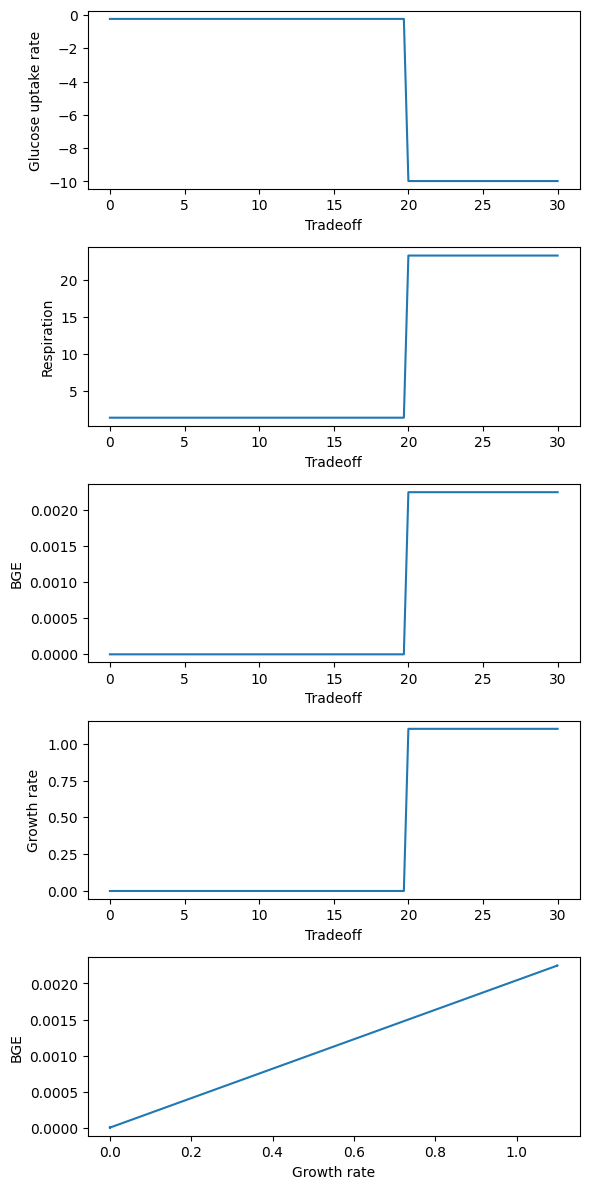

In [17]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1)

ax0.plot(tradeoffs, uptake_rate)
ax0.set_xlabel("Tradeoff")
ax0.set_ylabel("Glucose uptake rate")
# ax0.set_yscale("log")

ax1.plot(tradeoffs, opt_co2_ex)
ax1.set_xlabel("Tradeoff")
ax1.set_ylabel("Respiration")
# ax1.set_yscale("log")

ax2.plot(tradeoffs, opt_bge)
ax2.set_xlabel("Tradeoff")
ax2.set_ylabel("BGE")
# ax2.set_yscale("log")

ax3.plot(tradeoffs, opt_mu)
ax3.set_xlabel("Tradeoff")
ax3.set_ylabel("Growth rate")
# ax3.set_yscale("log")

ax4.plot(opt_mu, opt_bge)
ax4.set_xlabel("Growth rate")
ax4.set_ylabel("BGE")
# ax4.set_xscale("log")
# ax4.set_yscale("log")

fig.set_size_inches(6, 12)
fig.tight_layout()
